# Прогноз смерти пассажира при крушении по различным признакам

## Импорт данных и их предварительная обработка

In [1]:
import pandas as pd

In [2]:
df_test = pd.read_csv("data/test.csv")
df_train = pd.read_csv("data/train.csv")

In [3]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Два фрейма отличаются друг от друга наличием **целевой переменной**

In [5]:
full_df = pd.concat([df_test, df_train]) # функция concat объединяет два фрейма

In [6]:
full_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


In [7]:
# Информация о фрейме
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


# Предобработка данных
Далее нужно удалить столбцы которые никак не влияют на целевую переменную.

In [8]:
# axis 0 удаление по игрику 1 по иксу
full_df = full_df.drop(columns=["Cabin", "Ticket", "Embarked", "Name"], axis=1)

In [9]:
full_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,892,3,male,34.5,0,0,7.8292,NaN
1,893,3,female,47.0,1,0,7.0000,NaN
2,894,2,male,62.0,0,0,9.6875,NaN
3,895,3,male,27.0,0,0,8.6625,NaN
4,896,3,female,22.0,1,1,12.2875,NaN
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,0.0
887,888,1,female,19.0,0,0,30.0000,1.0
888,889,3,female,NaN,1,2,23.4500,0.0
889,890,1,male,26.0,0,0,30.0000,1.0


In [10]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1046 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1308 non-null   float64
 7   Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 92.0+ KB


Далее нужно убрать значения `NaN` по медиане, так как это будет чем то усредненным для каждого конкретного случая.

In [11]:
# убираем значения NaN
full_df["Age"] = full_df["Age"].fillna(full_df["Age"].median())
full_df["Survived"] = full_df["Survived"].fillna(full_df["Survived"].median())
full_df["Fare"] = full_df["Fare"].fillna(full_df["Fare"].median())

In [12]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1309 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Survived     1309 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 92.0+ KB


Визуализируем соотношение того сколько людей погибло и выжило в тот трагический день.

<AxesSubplot:xlabel='Survived', ylabel='count'>

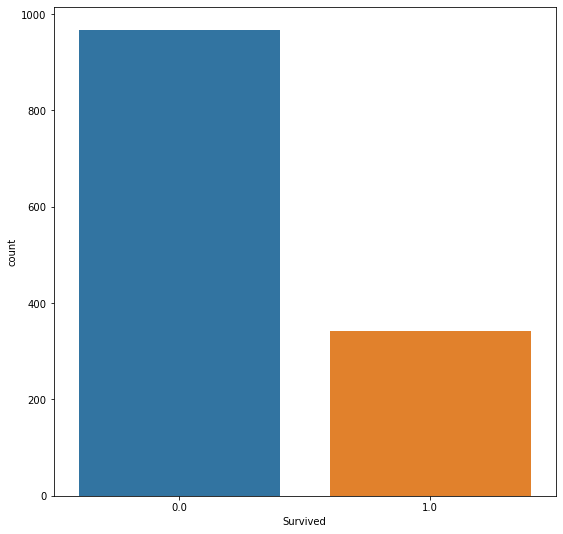

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(9, 9))
sns.countplot(full_df['Survived'])

Следом нужно преобразовать столбец `Sex` в тип понятный для модели машинного обучения. В этом может помочь `fit_transform`

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
full_df['Sex'] = le.fit_transform(full_df['Sex'])

In [15]:
full_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,892,3,1,34.5,0,0,7.8292,0.0
1,893,3,0,47.0,1,0,7.0000,0.0
2,894,2,1,62.0,0,0,9.6875,0.0
3,895,3,1,27.0,0,0,8.6625,0.0
4,896,3,0,22.0,1,1,12.2875,0.0


In [16]:
# перобразуем тип столбцов с плавающей точкой в целочисленный
full_df["Age"] = full_df["Age"].astype("int64")
full_df["Survived"] = full_df["Survived"].astype("int64")

In [17]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   int32  
 3   Age          1309 non-null   int64  
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1309 non-null   float64
 7   Survived     1309 non-null   int64  
dtypes: float64(1), int32(1), int64(6)
memory usage: 126.9 KB


# Построение модели машинного обучения
## Разбиение на тестовые и тренировочные данные

x_train, x_test, y_train, y_test - распределение  
x - признаки, y - целевая переменная

In [18]:
# Разделение на х и  у (Разделение на отдельные признаки и на отдельную целевую переменную)
x = full_df.drop(columns="Survived", axis=1)
y = full_df["Survived"].values

In [19]:
# разбиение на тренировочныые данные и тестовые данные 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [20]:
# размерность количество строк и количество строк
print(x_train.shape) 
print(y_train.shape)

(1047, 7)
(1047,)


In [21]:
# импортируется необходимый класс с методом близжайших соседей
from sklearn.neighbors import KNeighborsClassifier
# создаются списки в которые будут запихиваться значения
neighbors = [3, 6, 9] # количество соседей
train_score = []
test_score = []
# запускается цикл в качестве оптимизации гиперпараметров
for neig in neighbors:
    kn = KNeighborsClassifier(n_jobs=-1, n_neighbors=neig)
    kn.fit(x_train, y_train)
    train_score.append(kn.score(x_train, y_train))
    test_score.append(kn.score(x_test, y_test))

In [22]:
# вывод результатов
print(train_score)
print(test_score)

[0.8672397325692455, 0.8118433619866284, 0.7946513849092646]
[0.7519083969465649, 0.7595419847328244, 0.7557251908396947]


In [23]:
#вывод метрики 
from sklearn.metrics import classification_report
print(classification_report(y_test, kn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       189
           1       0.64      0.29      0.40        73

    accuracy                           0.76       262
   macro avg       0.70      0.61      0.62       262
weighted avg       0.73      0.76      0.72       262



Можно так же прогнать эти данные по ансамблевым методам

In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [25]:
# RandomForestClassifier
woods = [25, 50, 100]
train_score = []
test_score = []
for wo in woods:
    rf = RandomForestClassifier(n_estimators=wo)
    rf.fit(x_train, y_train)
    train_score.append(rf.score(x_train, y_train))
    test_score.append(rf.score(x_test, y_test))

In [26]:
print(train_score)
print(test_score)

[0.9961795606494747, 1.0, 1.0]
[0.8587786259541985, 0.8625954198473282, 0.8625954198473282]


In [27]:
print(classification_report(y_test, kn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       189
           1       0.64      0.29      0.40        73

    accuracy                           0.76       262
   macro avg       0.70      0.61      0.62       262
weighted avg       0.73      0.76      0.72       262



In [28]:
# GradientBoostingClassfier
gr = GradientBoostingClassifier()
gr.fit(x_train, y_train)
print(classification_report(y_test, kn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       189
           1       0.64      0.29      0.40        73

    accuracy                           0.76       262
   macro avg       0.70      0.61      0.62       262
weighted avg       0.73      0.76      0.72       262

